In [5]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [6]:
#dataset downloaded from kaggle 'train.csv'
datatype={"key":"object","fare_amount":"float64","pickup_datetime":"object","pickup_longitude":"float64","pickup_latitude":"float64","dropoff_longitude":"float64","dropoff_latitude":"float64","passenger_count":"int64"} 
data=pd.read_csv("train.csv",low_memory=False,nrows=10**5,dtype=datatype,parse_dates=["pickup_datetime"])
data.drop(['key'],axis=1,inplace=True)
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
data.shape

(100000, 7)

In [16]:
#datetime features
import calendar

data['pickup_date']=data['pickup_datetime'].dt.date
data['pickup_day']=data['pickup_datetime'].apply(lambda x:x.day)
data['pickup_hour']=data['pickup_datetime'].apply(lambda x:x.hour)
data['pickup_day_of_week']=data['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
data['pickup_month']=data['pickup_datetime'].apply(lambda x:x.month)
data['pickup_year']=data['pickup_datetime'].apply(lambda x:x.year)

data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [6]:
#verifying for NaN values
data.isnull().sum()

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_date           0
pickup_day            0
pickup_hour           0
pickup_day_of_week    0
pickup_month          0
dtype: int64

<AxesSubplot:xlabel='fare_amount', ylabel='count'>

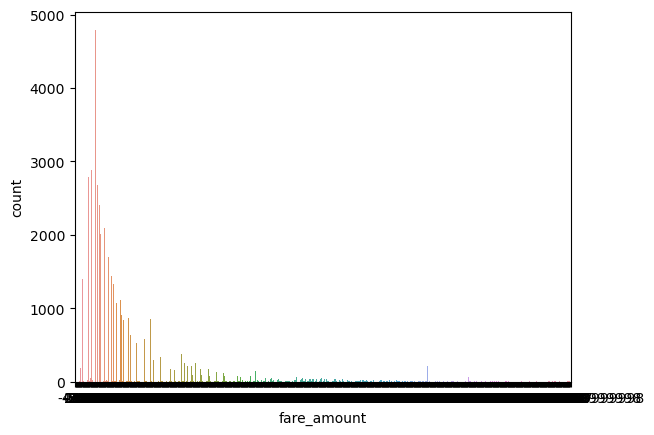

In [13]:
#visualisation for amount
sns.countplot(x="fare_amount",data=data)

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

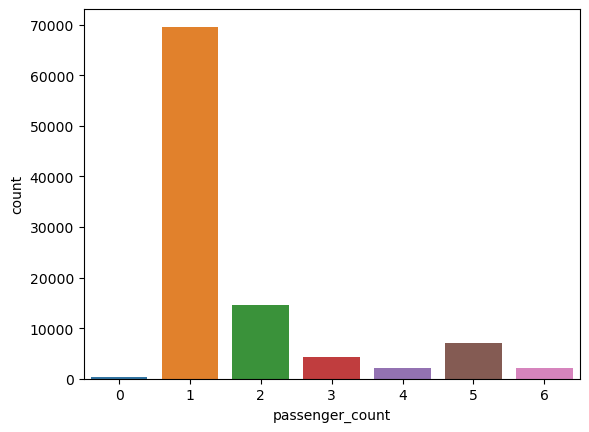

In [15]:
#visualisation for passenger count
sns.countplot(x="passenger_count",data=data)

<AxesSubplot:xlabel='pickup_year', ylabel='count'>

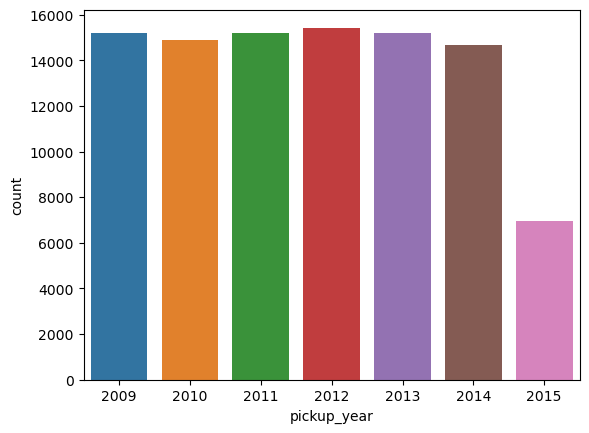

In [21]:
sns.countplot(x="pickup_year",data=data)

<AxesSubplot:xlabel='pickup_day_of_week', ylabel='count'>

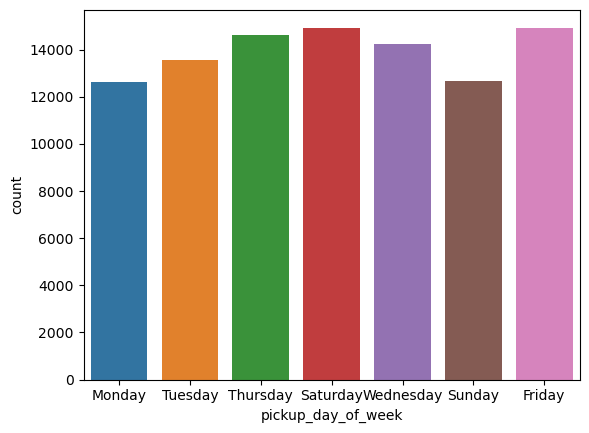

In [22]:
sns.countplot(x="pickup_day_of_week",data=data)

In [14]:
#top 5 fare amount
data['fare_amount'].value_counts(normalize=True).iloc[:5]

6.5    0.04795
4.5    0.04157
8.5    0.03834
5.3    0.02936
5.7    0.02877
Name: fare_amount, dtype: float64

In [19]:
#remove outlier
data=data[((data['pickup_longitude']>-78)&
           (data['pickup_longitude']<-70))&
           ((data['dropoff_longitude']>-78)&
           (data['dropoff_longitude']<-70))&
           ((data['pickup_latitude']>37)&
           (data['pickup_latitude']<45))&
           ((data['dropoff_latitude']>37)&
           (data['dropoff_latitude']<45))&
           (data['passenger_count']>0)&
           (data['fare_amount']>=2.5)]

In [20]:
#see for the change in data after outliers
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000
mean,11.354236,-73.975142,40.751032,-73.974017,40.751466,1.680386,15.663000,13.492870,6.264144,2011.743267
std,9.698185,0.043751,0.036181,0.039904,0.037161,1.298536,8.676972,6.505561,3.451690,1.871159
min,2.500000,-75.425388,38.754215,-75.354559,39.296307,1.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992266,40.736642,-73.991395,40.735762,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.982076,40.753531,-73.980437,40.753962,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.968287,40.767677,-73.965127,40.768476,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,-70.140793,43.183332,-72.854940,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


In [23]:
#analyse passenger count
data['passenger_count'].value_counts()

1    68120
2    14293
5     6876
3     4214
4     2042
6     2004
Name: passenger_count, dtype: int64

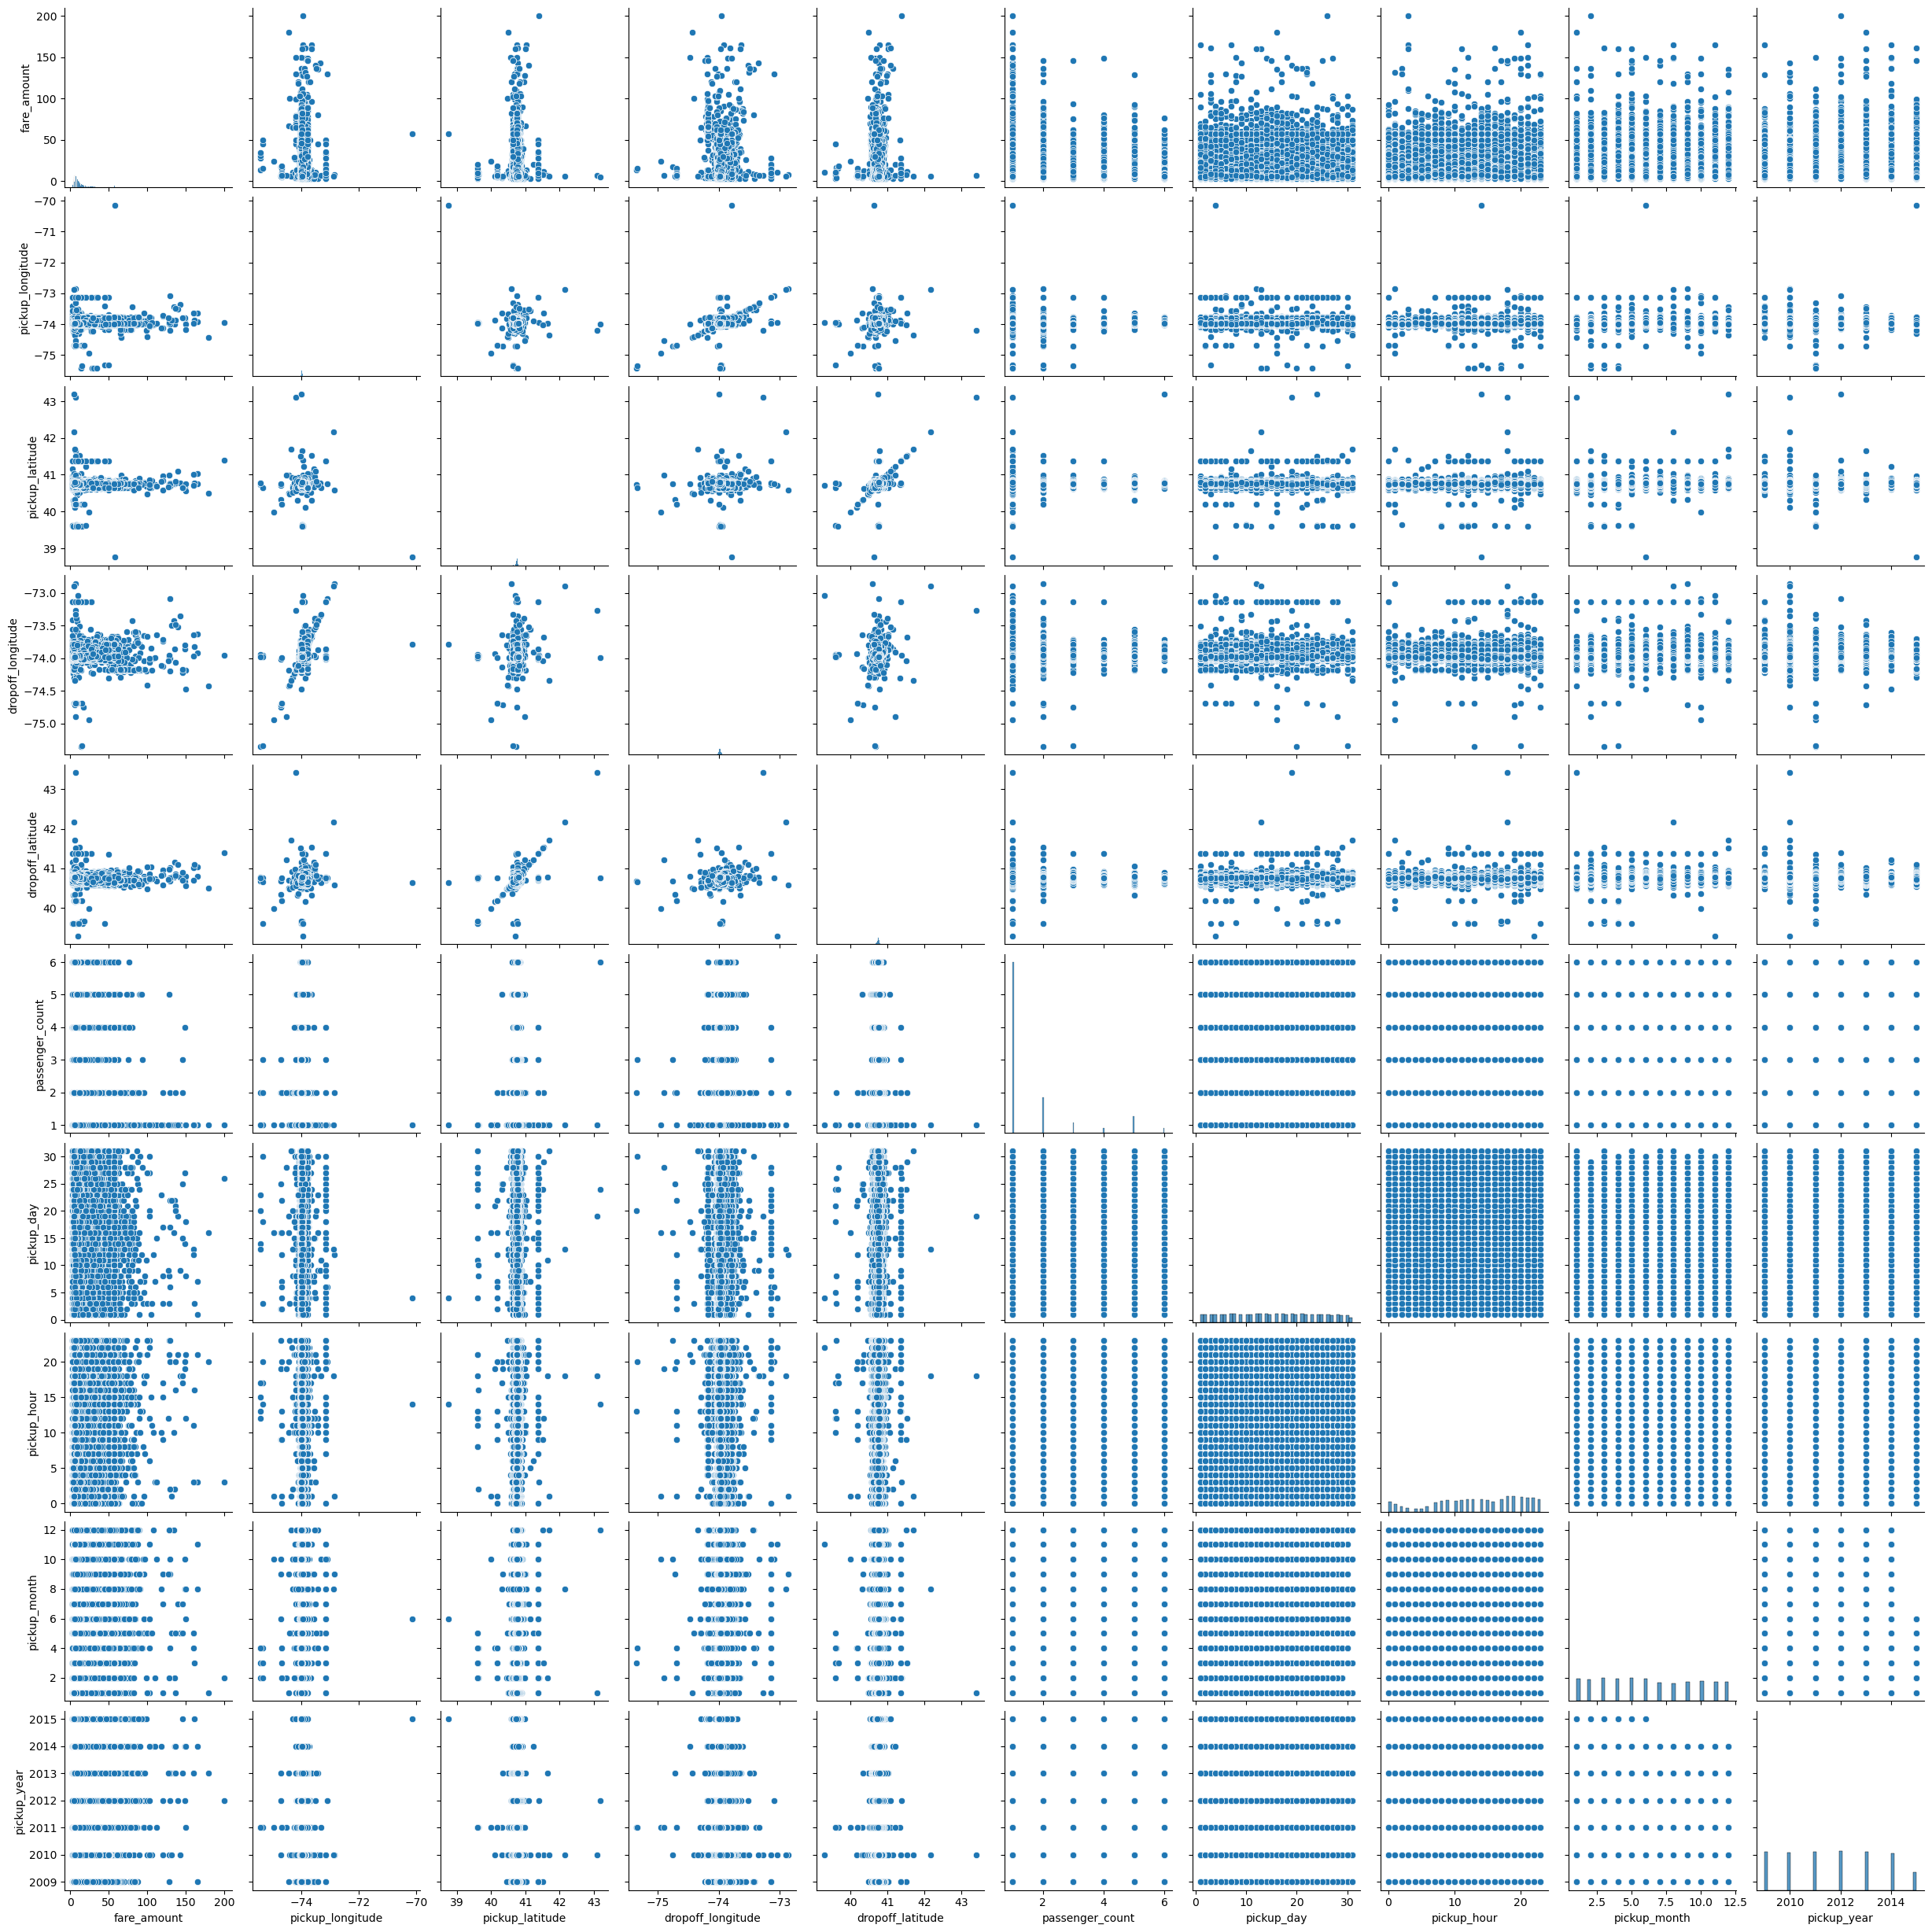

In [25]:
sns.pairplot(data)
plt.show()

<AxesSubplot:>

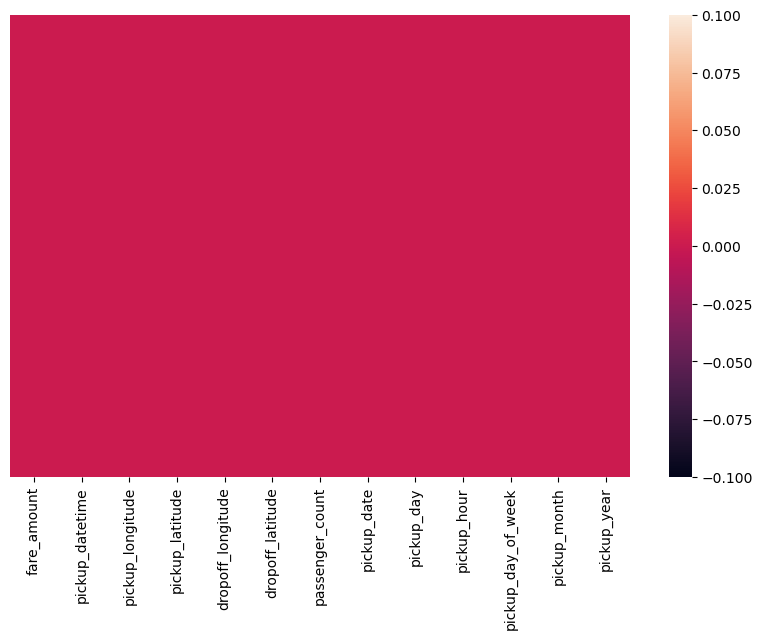

In [29]:
#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False)

In [31]:
dataf=data.copy()
dataf.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [32]:
var={'Monday':1,'Tuesday':2,'Wednesday':5,'Thursday':3,'Friday':7,'Saturday':4,'Sunday':6}
year={2012:1,2013:2,2011:3,2009:4,2010:5,2014:6,2015:7}
dataf['pickup_year']=dataf['pickup_year'].map(year)
dataf['pickup_day_of_week']=dataf['pickup_day_of_week'].map(var)
dataf.drop(['pickup_datetime','pickup_date'],axis=1,inplace=True)
dataf.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,4
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,5
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,3,8,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,4,4,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,5


In [33]:
from sklearn.model_selection import train_test_split
x=dataf.drop(['fare_amount'],axis=1)
y=dataf[['fare_amount']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [41]:
print("shape of x_train:",x_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (68284, 10)
shape of x_test: (29265, 10)
shape of y_train: (68284, 1)
shape of y_test: (29265, 1)


In [35]:
#linear regression
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
from sklearn.metrics import mean_squared_error
print("RMSE:%.3f" % mean_squared_error(y_test,y_pred) ** 0.5)

RMSE:8.456


In [2]:
#svm
from sklearn.svm import SVR
model2=SVR(kernel='rbf')
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)

print("RMSE:%.3f" % mean_squared_error(y_test, y_pred) ** 0.5)

NameError: name 'x_train' is not defined

In [64]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
model3=DecisionTreeRegressor()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
print("RMSE:%.3f" % mean_squared_error(y_test,y_pred) ** 0.5)

RMSE:6.108


In [50]:
#random forest
from sklearn.ensemble import RandomForestRegressor
model4=RandomForestRegressor(max_depth = 5,random_state=0,n_estimators=200)
model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)
print("RMSE:%.3f" % mean_squared_error(y_test,y_pred) ** 0.5)

RMSE:5.792


In [ ]:
#bagging regression
from sklearn.ensemble import BaggingRegressor
model5 = BaggingRegressor( n_estimators=150,random_state=0)
model5.fit(x_train,y_train)
y_predict = model5.predict(x_test)
print("RMSE:%.3f" % mean_squared_error(y_test,y_pred) ** 0.5)

In [55]:
#adaboost regression
from sklearn.ensemble import AdaBoostRegressor
model6 = AdaBoostRegressor( n_estimators=150,random_state=0)
model6.fit(x_train,y_train)
y_predict = model6.predict(x_test)
print("RMSE:%.3f" % mean_squared_error(y_test,y_pred) ** 0.5)

RMSE:5.792


In [59]:
#gradient boost
from sklearn.ensemble import GradientBoostingRegressor
model7 = GradientBoostingRegressor( n_estimators=150,random_state=0)
model7.fit(x_train,y_train)
y_predict = model7.predict(x_test)
print("RMSE:%.3f" % mean_squared_error(y_test,y_pred) ** 0.5)

RMSE:5.792
